# Single star

[Jump down to condensed example](#condensed)

---

#### This notebook is a basic runthrough for a single star from beginning to end

In [1]:
from pysyd import plots
from pysyd.target import Target
from pysyd.utils import Parameters

The `Parameters` object is a container class for default `pySYD` parameters. Since the software is customizable down to the individual star level - we create one large, default dictionary, check for star-specific information and then copy that to the individual star's dictionary. So for n stars, you will have at least n keys in the main parameter dictionary.

## KIC 2309595

### Step 1. Load `pySYD` default parameters

In [2]:
params = Parameters()
print(params)

<Parameters>


### Step 2. Add a target (or any number of targets)

In [3]:
name = '2309595'
params.add_targets(stars=name)

# Both verbose output and displaying of figures are disabled since the software is
# optimized for running many stars, so let's change those!

params.params[name]['show'], params.params[name]['verbose'] = True, True

Now that we have the relevant information we want, let's create a pipeline `Target` object (or star).

### Step 3. Create pipeline `Target` 

In [4]:
star = Target(name, params)
print(star)

<Star 2309595>


The individual star's dictionary is copied to the main params class for this object, so now you only have the single dictionary (you can think of it as a `pop` of the main dictionary, but it makes copies instead of removing). This means we can directly access the defaults without using the star's name as a keyword -- so now we can change whatever we want directly!

In [5]:
print(star.params)

{'path': '/Users/ashleychontos/Research/Code/special/pySYD/docs/usage/nb/results/2309595', 'show': True, 'save': True, 'test': False, 'verbose': True, 'overwrite': False, 'warnings': False, 'stitch': False, 'gap': 20, 'kep_corr': False, 'oversampling_factor': None, 'estimate': True, 'seed': None, 'numax': None, 'force': False, 'dnu': None, 'binning': 0.005, 'bin_mode': 'mean', 'lower_ex': None, 'upper_ex': None, 'step': 0.25, 'smooth_width': 20.0, 'n_trials': 3, 'ask': False, 'background': True, 'basis': 'tau_sigma', 'box_filter': 1.0, 'fix_wn': False, 'n_laws': None, 'ind_width': 20.0, 'lower_bg': None, 'upper_bg': None, 'metric': 'bic', 'n_rms': 20, 'globe': True, 'ex_width': 1.0, 'lower_ps': None, 'upper_ps': None, 'sm_par': None, 'n_peaks': 5, 'smooth_ps': 2.5, 'fft': True, 'threshold': 1.0, 'hey': False, 'cmap': 'binary', 'clip_value': 3.0, 'interp_ech': False, 'notching': False, 'lower_ech': None, 'upper_ech': None, 'npb': 10, 'nox': None, 'noy': '0+0', 'ridges': False, 'smooth_e

Now we will attempt to load in the target data which will return a boolean that says if it's ok to proceed.

In [6]:
print(star.load_data())



ERROR: no data found for target 2309595
     -> please make sure you are in the correct
        directory and try again!

False


Well, glad that worked as expected. By default it assumes that the input data and information reside in the current working directory (which is not the case here because I live in the documentation folder). Let's change the paths and try again! 

(i.e. I am going to use the path that works for my example notebook but you will need to change this to wherever your example data are)

In [7]:
star.params['inpdir']='/Users/ashleychontos/Research/Code/special/pySYD/dev/data/'
star.params['infdir']='/Users/ashleychontos/Research/Code/special/pySYD/dev/info/'
star.params['outdir']='/Users/ashleychontos/Research/Code/special/pySYD/dev/results/'

print(star.load_data())


-----------------------------------------------------------
Target: 2309595
-----------------------------------------------------------
# LIGHT CURVE: 41949 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 106123 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.400298 muHz
True


Looks like we're ready to go!

Let's estimate some starting points for the main module.

### Step 3. Estimate parameters

-----------------------------------------------------------
PS binned to 224 datapoints

Numax estimates
---------------
Estimate 1: 636.51 +/- 10.12
S/N: 10.88
Estimate 2: 656.61 +/- 29.93
S/N: 9.60
Estimate 3: 686.28 +/- 85.35
S/N: 7.38
Selecting model 1


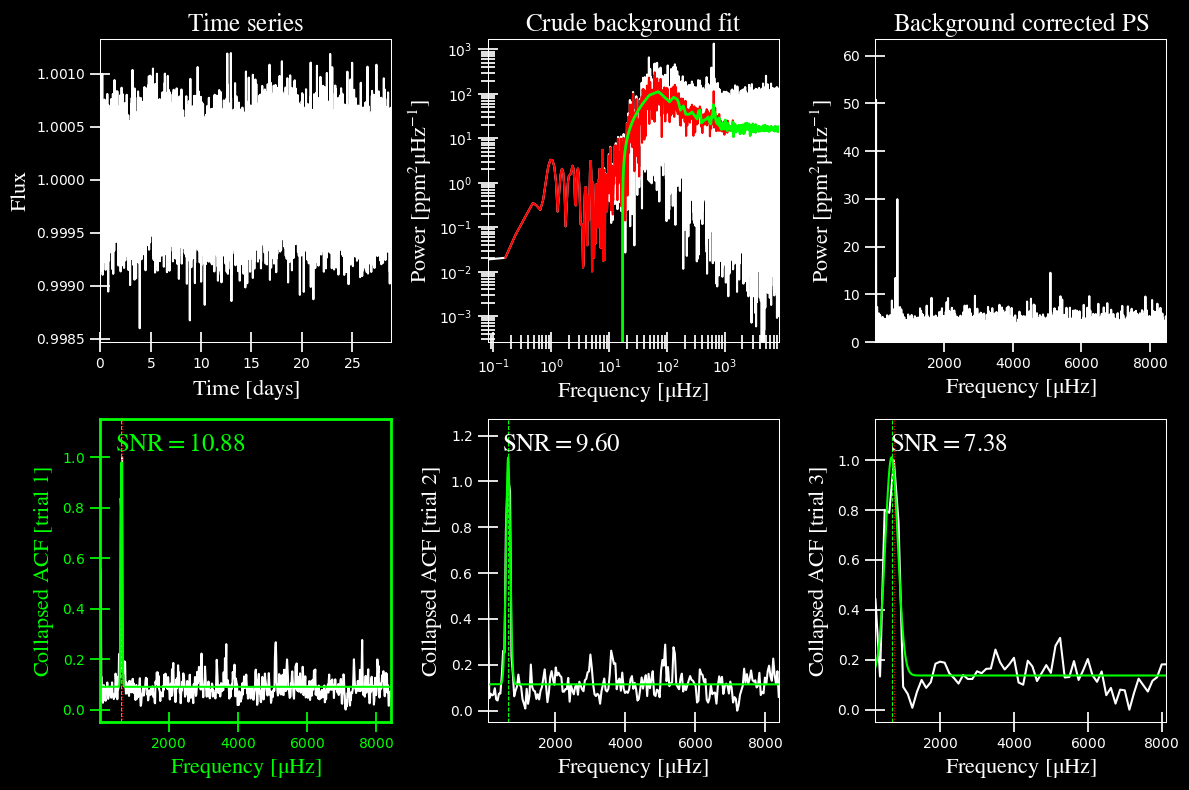

In [8]:
star.estimate_parameters()
plots.plot_estimates(star)

All the trials give consistent answers for $\rm \nu_{max}$ that I also agree with by eye, so I think we can move on to the full fit.

### Step 4. Derive parameters

In [9]:
star.derive_parameters()
plots.plot_parameters(star)

-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 397 data points

Background model
----------------
Comparing 8 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 39836.17 | AIC = 100.34
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 40791.87 | AIC = 102.74
Model 2: 1 Harvey-like component(s) + white noise fixed
 BIC = 39848.14 | AIC = 100.35
Model 3: 1 Harvey-like component(s) + white noise term
 BIC = 40803.88 | AIC = 102.75
Model 4: 2 Harvey-like component(s) + white noise fixed
 BIC = 39860.10 | AIC = 100.36
Model 5: 2 Harvey-like component(s) + white noise term
 BIC = 40815.81 | AIC = 102.76
Model 6: 3 Harvey-like component(s) + white noise fixed
 BIC = 39872.07 | AIC = 100.37
Model 7: 3 Harvey-like component(s) + white noise term
 BIC = 40828.11 | AIC = 102.77
Based on BIC statistic: model 0


AttributeError: module 'pysyd.utils' has no attribute 'save_file'

In the verbose output, the 'output parameters' have no uncertainties on the derived values. This is because the number of iterations is 1 by default, for a single iteration. You also might've noticed that there are two different estimates for $\rm \nu_{max}$. **For posterity, the `SYD` pipeline also estimated both of these values but traditionally used** $\rm \nu_{max,smooth}$ **within the literature.** ***We recommend that you do the same.***

To estimate uncertainties for these parameters, we'll need to set the number of iterations to something much higher (typically on the order of a hundred or so).

### Step 5. Derive uncertainties

In [10]:
star.params['show'], star.params['mc_iter'] = False, 200
star.process_star()

-----------------------------------------------------------
PS binned to 224 datapoints

Numax estimates
---------------
Estimate 1: 636.51 +/- 10.12
S/N: 10.88
Estimate 2: 656.61 +/- 29.93
S/N: 9.60
Estimate 3: 686.28 +/- 85.35
S/N: 7.38
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 397 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 39836.17 | AIC = 100.34
Model 1: 1 Harvey-like component(s) + white noise fixed
 BIC = 39848.14 | AIC = 100.35
Model 2: 2 Harvey-like component(s) + white noise fixed
 BIC = 39860.10 | AIC = 100.36
Model 3: 3 Harvey-like component(s) + white noise fixed
 BIC = 39872.07 | AIC = 100.37
Based on BIC statistic: model 0


AttributeError: module 'pysyd.utils' has no attribute 'save_file'

### Step 6. Peep results

In [11]:
star.params['show'] = True
plots.plot_samples(star)

AttributeError: 'Target' object has no attribute 'df'

As you can see, it still liked the same model (good sanity check) and the derived value for $\rm \nu_{max}$ was robust to this and did not change.

So now we have both parameters and uncertainties!

---

# Condensed version <a id='condensed'></a>

\[ Putting it all together with `star.process_star()` \]

In [ ]:
name='2309595'
params = Parameters()
params.add_targets(stars=name)
params.params[name]['verbose'], params.params[name]['mc_iter'] = True, 200
star = Target(name, params)
if star.load_data():
    star.process_star()

---